## Casos confirmados de COVID-19

In [2]:
import pandas as pd
from urllib.request import urlretrieve
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
 
urlretrieve( url, 'Untitled Folder 1/global_cases_covid19.csv')

('Untitled Folder 1/global_cases_covid19.csv',
 <http.client.HTTPMessage at 0x199c4d5c208>)

In [4]:
df_covid = pd.read_csv('Untitled Folder 1/global_cases_covid19.csv')

In [6]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343


In [8]:
#Excluir colunas que não irei utilizar, neste caso as de latitude e Longitude 
#Utilizo o Axis para deixar claro o que quero excluir, axis = 0 seria apenas a linha, neste caso, axis = 1 é a coluna
#Utilizo o Inplace para que seja retirada de imediato do DF direto.
df_covid.drop(['Lat', 'Long'], axis = 1, inplace=True)

In [9]:
df_covid.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584
1,NaN,Albania,0,0,0,0,0,0,0,0,...,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343


In [14]:
#Neste caso, quero retirar os as províncias, então uso groupby com o sum para somar os números dos países, ignorando estados e provincias.
df_country = df_covid.groupby('Country/Region').sum()

In [13]:
df_country 

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584
Albania,0,0,0,0,0,0,0,0,0,0,...,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627
Algeria,0,0,0,0,0,0,0,0,0,0,...,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641
Andorra,0,0,0,0,0,0,0,0,0,0,...,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682
Angola,0,0,0,0,0,0,0,0,0,0,...,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1494,1497,1504,1505,1509,1512,1513,1514,1515,1520
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,141219,142228,143169,144257,145252,146074,146701,147400,148171,148968
Yemen,0,0,0,0,0,0,0,0,0,0,...,2101,2101,2101,2102,2104,2104,2104,2104,2105,2107


In [17]:
#Loc para acessar as linhas
df_country.loc['Brazil']

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
1/8/21     8013708
1/9/21     8075998
1/10/21    8105790
1/11/21    8131612
1/12/21    8195637
Name: Brazil, Length: 357, dtype: int64

In [18]:
#Criando um novo array, que contenha apenas data e outro com valores
#Neste caso, as datas são os índices da series, então usamos .index para pegar eles
#No caso dos valores, usamos .values 
date = df_country.loc['Brazil'].index
cases = df_country.loc['Brazil'].values

In [19]:
cases

array([      0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87

<BarContainer object of 357 artists>

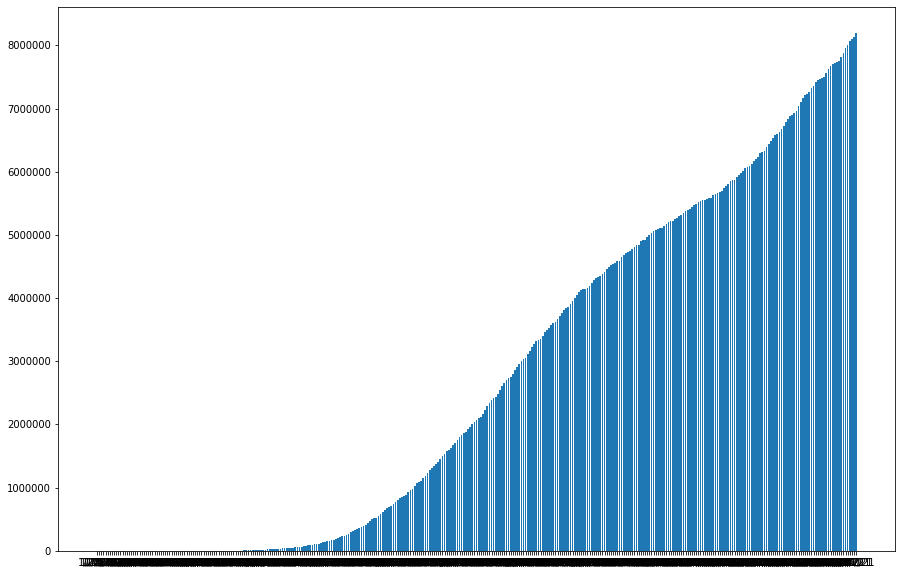

In [26]:
#Usando gráfico de barras
#Usando o Figsize para ajustar o tamanho do gráfico
plt.figure(figsize = (15, 10))
plt.bar(date, cases)

In [27]:
df_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584
Albania,0,0,0,0,0,0,0,0,0,0,...,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627
Algeria,0,0,0,0,0,0,0,0,0,0,...,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641
Andorra,0,0,0,0,0,0,0,0,0,0,...,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682
Angola,0,0,0,0,0,0,0,0,0,0,...,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343


In [29]:
#Criando uma series
s_brazil = df_country.loc['Brazil']

In [31]:
#Uso este comando para excluir os dias onde o covid não estava no Brasil ainda.
s_brazil = s_brazil[s_brazil > 0]

In [32]:
s_brazil.index

Index(['2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       ...
       '1/3/21', '1/4/21', '1/5/21', '1/6/21', '1/7/21', '1/8/21', '1/9/21',
       '1/10/21', '1/11/21', '1/12/21'],
      dtype='object', length=322)

In [33]:
s_brazil.values

array([      1,       1,       1,       2,       2,       2,       2,
             4,       4,      13,      13,      20,      25,      31,
            38,      52,     151,     151,     162,     200,     321,
           372,     621,     793,    1021,    1546,    1924,    2247,
          2554,    2985,    3417,    3904,    4256,    4579,    5717,
          6836,    8044,    9056,   10360,   11130,   12161,   14034,
         16170,   18092,   19638,   20727,   22192,   23430,   25262,
         28320,   30425,   33682,   36658,   38654,   40743,   43079,
         45757,   50036,   54043,   59324,   63100,   67446,   73235,
         79685,   87187,   92202,   97100,  101826,  108620,  115455,
        126611,  135773,  146894,  156061,  162699,  169594,  178214,
        190137,  203165,  220291,  233511,  241080,  255368,  271885,
        291579,  310087,  330890,  347398,  363211,  374898,  391222,
        411821,  438238,  465166,  498440,  514849,  526447,  555383,
        584016,  614

Text(0.5, 1.0, 'Total de Casos confirmados Covid-19 no Brasil')

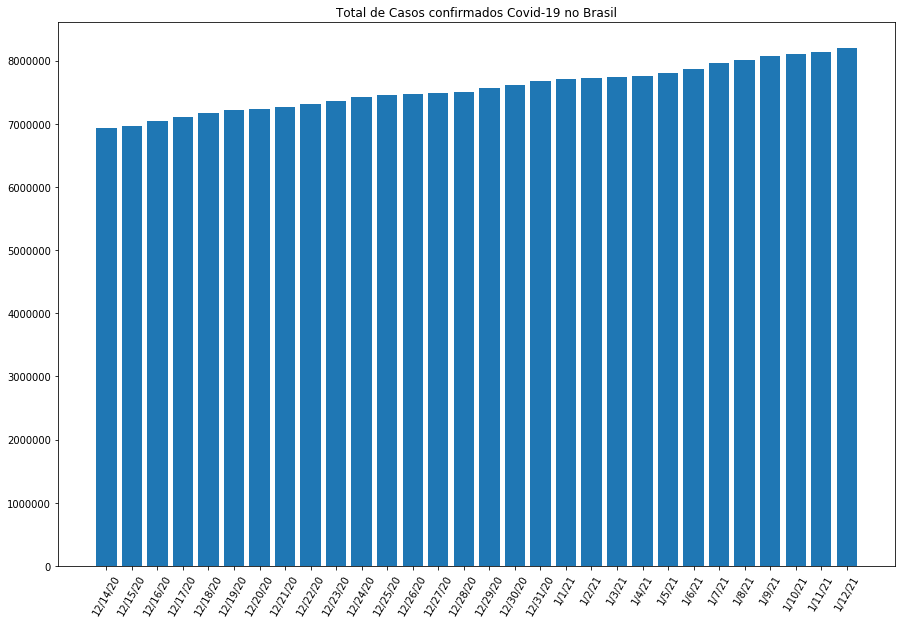

In [44]:
#Faço o lam para plotar os últimos 30 dias
# Usando o len para pegar o tamanho da series e coloca-lo no Tam
#Ai fazemos para ele plotar do Tam - 30, até o final, ai no caso pega só os últimos 30 dias.
#xticks para o eixo X ficar numa inclinação de 60°
#plt.tilte para colocar um título


tam = len(s_brazil)
plt.figure(figsize = (15, 10))
plt.xticks(rotation = 60)
plt.bar(s_brazil.index[tam-30:tam], s_brazil.values[tam-30:tam])
plt.title('Total de Casos confirmados Covid-19 no Brasil')